### Load dataset

In [14]:
import os
from keras.preprocessing import image

base_dir = '/tf/data'

# Directories for training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


#Directory with training coffee pictures
train_coffee_dir = os.path.join(train_dir, 'coffee')
# Directory with training noncoffee pictures
train_noncoffee_dir = os.path.join(train_dir, 'noncoffee')


# Directory with validation coffee pictures
validation_coffee_dir = os.path.join(validation_dir, 'coffee')
# Directory with validation noncoffee pictures
validation_noncoffee_dir = os.path.join(validation_dir, 'noncoffee')

# Directory with test coffee pictures
test_coffee_dir = os.path.join(test_dir, 'coffee')
# Directory with test noncoffee pictures
test_noncoffee_dir = os.path.join(test_dir, 'noncoffee')

img = image.load_img(os.path.join(train_coffee_dir, os.listdir(train_coffee_dir)[0]))

### Data augmentation

In [15]:
# Use ImageDataGenerator to perform Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

In [16]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

### Training model + Dropout

In [17]:
# Define de model to train
from keras import layers
from keras import models
from tensorflow.keras import optimizers

In [29]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
            input_shape=(img.size[0], img.size[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(learning_rate=1e-4),
            metrics=['acc'])

In [30]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=img.size,
                batch_size=20,
                class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=img.size,
                    batch_size=20,
                    class_mode='binary')

Found 1800 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [31]:
history = model.fit(
        train_generator,
        # train_generator: Found 1800 images => images/batch_size = steps_per_epoch => 1800/20 = 90
        steps_per_epoch=90,    
        epochs=60,
        validation_data=validation_generator,
        # validation_generator: Found 600 images => images/batch_size = validation_steps => 600/20 = 30
        validation_steps=30)   

Epoch 1/60
90/90 [==============================] - 3s 24ms/step - loss: 0.6256 - acc: 0.6594 - val_loss: 0.6048 - val_acc: 0.6867
Epoch 2/60
90/90 [==============================] - 2s 23ms/step - loss: 0.5769 - acc: 0.7033 - val_loss: 0.5973 - val_acc: 0.6783
Epoch 3/60
90/90 [==============================] - 2s 23ms/step - loss: 0.5548 - acc: 0.7267 - val_loss: 0.5760 - val_acc: 0.7167
Epoch 4/60
90/90 [==============================] - 2s 23ms/step - loss: 0.5236 - acc: 0.7356 - val_loss: 0.5316 - val_acc: 0.7300
Epoch 5/60
90/90 [==============================] - 2s 23ms/step - loss: 0.5164 - acc: 0.7439 - val_loss: 0.5311 - val_acc: 0.7283
Epoch 6/60
90/90 [==============================] - 2s 23ms/step - loss: 0.4889 - acc: 0.7622 - val_loss: 0.4973 - val_acc: 0.7300
Epoch 7/60
90/90 [==============================] - 2s 23ms/step - loss: 0.4751 - acc: 0.7650 - val_loss: 0.5000 - val_acc: 0.7433
Epoch 8/60
90/90 [==============================] - 2s 23ms/step - loss: 0.4650 - a

### Plot results

In [23]:
import matplotlib.pyplot as plt

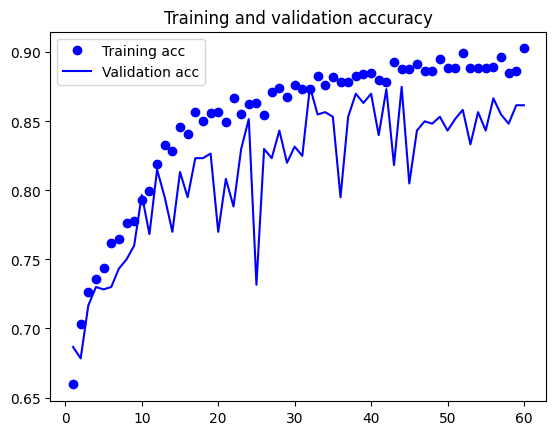

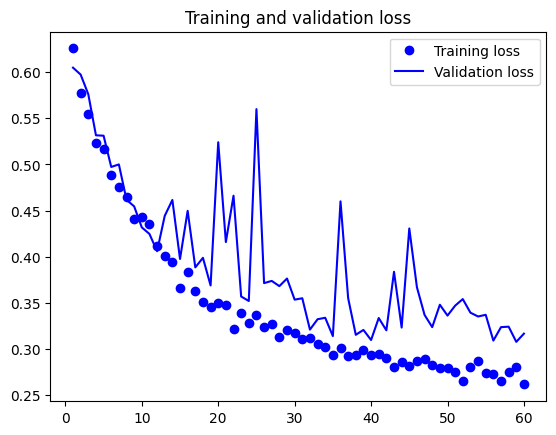

In [32]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()